In [63]:
%matplotlib inline

In [64]:
# Import Dependencies
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [83]:
# Extracting final dataset for ML
path = 'Final_Datasets/Final_Movies_dataset.csv'
movies_df = pd.read_csv(path)
movies.columns.tolist()
# movies.dtypes

['budget_ds-movies',
 'company',
 'country',
 'genre',
 'rating',
 'score',
 'keywords',
 'original_language',
 'overview',
 'popularity',
 'revenue',
 'title',
 'Ave_runtime',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Votes_Count',
 'keywords_dict']

In [84]:
# Cleaning null values from keywords_dict
print(movies_df.isnull().sum())
movies = movies_df.dropna()
movies.isnull().sum()

budget_ds-movies       0
company                0
country                0
genre                  0
rating                 0
score                  0
keywords               0
original_language      0
overview               0
popularity             0
revenue                0
title                  0
Ave_runtime            0
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Votes_Count            0
keywords_dict        111
dtype: int64


budget_ds-movies     0
company              0
country              0
genre                0
rating               0
score                0
keywords             0
original_language    0
overview             0
popularity           0
revenue              0
title                0
Ave_runtime          0
Netflix              0
Hulu                 0
Prime Video          0
Disney+              0
Votes_Count          0
keywords_dict        0
dtype: int64

## TfidfVectorizer function using "overview"

In [85]:
# Use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['overview'])
tfidf_matrix

<3068x89802 sparse matrix of type '<class 'numpy.float64'>'
	with 162544 stored elements in Compressed Sparse Row format>

In [86]:
# Use the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
df_array = pd.DataFrame(cosine_sim)
df_array

,0,1,2,3,4,5,6,7,8,9,...,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067
0,1.000000,0.01011,0.000000,0.000000,0.000000,0.000000,0.007574,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.012971,0.000000
1,0.010110,1.00000,0.000000,0.000000,0.000000,0.000000,0.004082,0.000000,0.008163,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.005073,0.006698,0.003086,...,0.009891,0.0,0.0,0.004795,0.0,0.005643,0.005809,0.000000,0.000000,0.003487
3,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006362,0.0,0.0,0.005703,0.0,0.000000,0.000000,0.009125,0.004563,0.000000
4,0.000000,0.00000,0.000000,0.000000,1.000000,0.021472,0.004177,0.000000,0.000000,0.001737,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.019977,0.002719,0.003919,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,0.000000,0.00000,0.005643,0.000000,0.000000,0.000000,0.005735,0.000000,0.000000,0.017478,...,0.000000,0.0,0.0,0.008727,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
3064,0.000000,0.00000,0.005809,0.000000,0.019977,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
3065,0.000000,0.00000,0.000000,0.009125,0.002719,0.004727,0.000000,0.000000,0.000000,0.009782,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
3066,0.012971,0.00000,0.000000,0.004563,0.003919,0.006814,0.000000,0.014792,0.000000,0.000000,...,0.004087,0.0,0.0,0.003663,0.0,0.000000,0.000000,0.000000,1.000000,0.000000


In [87]:
# Write a function that returns the 20 most similar movies based on the cosine similarity score
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def recommendations(title):
    idx = indices[title]
    print(idx, "\n\n")
    sim_scores = list(enumerate(cosine_sim[idx]))
    print(sim_scores, "\n\n")
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    print(f'SIM_SCORES FOR BEST 20 PLACES {sim_scores}', "\n\n")
    movie_indices = [i[0] for i in sim_scores]
    print(f'ORIGINAL INDEX FROM DATAFRAME {movie_indices}', "\n\n")
    return titles.iloc[movie_indices]

In [88]:
# Run the function based on "overview" column
recommendations('The Lion King')

316 


[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0038489009840754077), (7, 0.005235759814209063), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.010566501723687487), (16, 0.0), (17, 0.0), (18, 0.0072390079061793), (19, 0.0), (20, 0.0), (21, 0.011496986395050202), (22, 0.010324794156658332), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.006554500343052295), (30, 0.006554500343052295), (31, 0.0), (32, 0.0038484413346232265), (33, 0.0), (34, 0.009687071881586214), (35, 0.005864203391230306), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.009630441771789448), (43, 0.0), (44, 0.0), (45, 0.008617905011981416), (46, 0.0), (47, 0.0), (48, 0.010097671370430935), (49, 0.0037601759935902554), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.011998885413863406), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.013700092297715391), (62, 0.013700092297715391), (6

2057                        The Hurt Locker
1197                             Panic Room
2624                      Our Idiot Brother
2589                           Killer Elite
2703         House at the End of the Street
566                          The Full Monty
2996                       The November Man
1690                          The Producers
3173                               The Boss
1529                               Catwoman
158                The Hunt for Red October
976                             The Watcher
1978                        Good Luck Chuck
1464                                    Saw
1666                          Four Brothers
2637      Big Mommas: Like Father, Like Son
1474                      Kill Bill: Vol. 2
629     Lock, Stock and Two Smoking Barrels
2111                                  Doubt
181                      Quigley Down Under
Name: title, dtype: object

## TfidfVectorizer function using "keywords_dict"

In [89]:
# Use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['keywords_dict'])
tfidf_matrix

<3068x32184 sparse matrix of type '<class 'numpy.float64'>'
	with 73474 stored elements in Compressed Sparse Row format>

In [90]:
# Use the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
df_array = pd.DataFrame(cosine_sim)
df_array

,0,1,2,3,4,5,6,7,8,9,...,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067
0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.007641,...,0.0,0.0,0.000000,0.000000,0.000000,0.033466,0.0,0.082028,0.069129,0.0
1,0.000000,1.000000,0.000000,0.014118,0.0,0.000000,0.0,0.0,0.018180,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.029763,0.000000,...,0.0,0.0,0.000000,0.011495,0.011345,0.000000,0.0,0.000000,0.021178,0.0
3,0.000000,0.014118,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,1.0,0.044338,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,0.033466,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0
3064,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.049815,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0
3065,0.082028,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.016392,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.148297,0.0
3066,0.069129,0.000000,0.021178,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.029385,...,0.0,0.0,0.000000,0.141487,0.042146,0.000000,0.0,0.148297,1.000000,0.0


In [91]:
# Run the function based on "overview" column
recommendations('The Lion King')

316 


[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.01570282958617274), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.02814300109907526), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.02207762067951489), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.045994986204938464), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.02927566297137122), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0), (61, 0.0), (62, 0.0), (63, 0.0), (64, 0.0), (65, 0.0), (66, 0.0), (67, 0.0), (68, 0.0), (69, 0.0), (70, 0.045071544944711744), (71, 0.0), (72, 0.0), (73, 0.0), (74, 0.0), (75, 0.0), (76, 0.0), (77, 0.0), (78, 0.0), (79, 0.0), (80, 0.0), (81, 0.0), (8

1039                           Ocean's Eleven
1365             How to Lose a Guy in 10 Days
338                           Renaissance Man
2067                                  Hancock
2006                                      War
498         A Thin Line Between Love and Hate
2367                     I Spit on Your Grave
2948                Jack Ryan: Shadow Recruit
1992                              The Kingdom
1184    The Lord of the Rings: The Two Towers
3086                            Run All Night
2835                                  Riddick
2057                          The Hurt Locker
2166                            The Love Guru
1139                                Antitrust
1799                  Mission: Impossible III
594                       Two Girls and a Guy
2141                           Righteous Kill
2749              Beasts of the Southern Wild
51                      Good Morning, Vietnam
Name: title, dtype: object

## Create a wordcloud of the movie overview

C:\Users\dahia\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


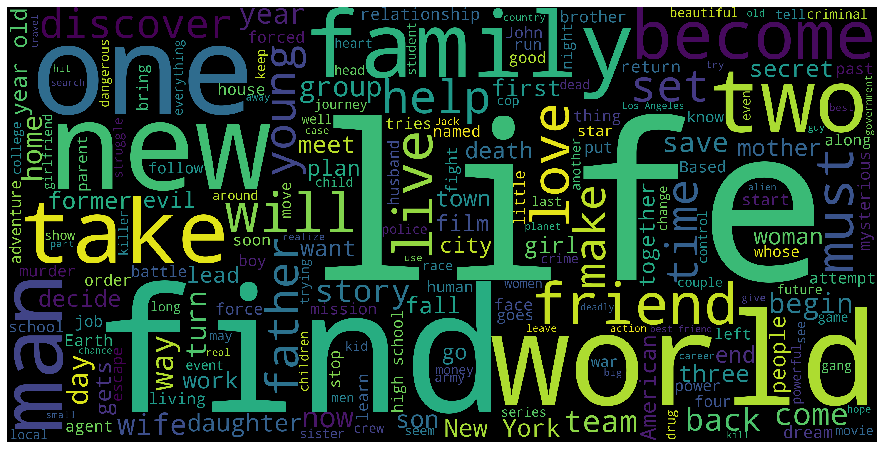

In [92]:
# Create a wordcloud of the movie overview
movies['overview'] = movies['overview'].fillna("").astype('str')
genre_corpus = ' '.join(movies['overview'])
genre_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(genre_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(genre_wordcloud)
plt.axis('off')
plt.show()

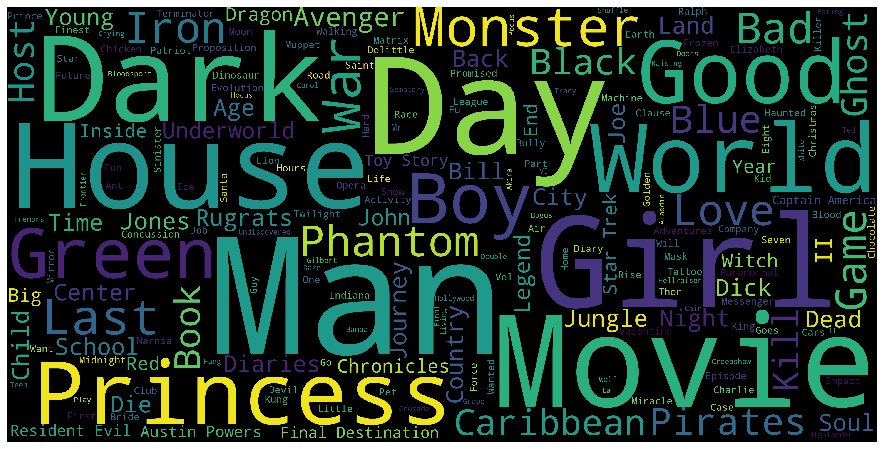

In [22]:
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()